In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [103]:
df = pd.read_excel ("D:\Final_Project\Kylian Mbappé.xlsx")#import excel file to workbook
print (df) #insert the data table
df

      Season       Club  Match  Match start  Time played (Min)  Goals  Assist  \
0  2021/2022  Paris S-G     19         1.00               1637      9      10   
1  2020/2021  Paris S-G     47         0.87               3711     42      11   
2  2019/2020  Paris S-G     37         0.89               2716     30      14   
3  2018/2019  Paris S-G     43         0.77               3492     39      14   
4  2017/2018  Paris S-G     44         0.91               3395     21      15   

   Shoots  On Target  Passes  Completed Passes   MV  
0      69         25     685               555  160  
1     136         69    1228               983  180  
2     117         67     851               697  200  
3     154         81    1009               804  120  
4     114         53     819               618   90  


,Season,Club,Match,Match start,Time played (Min),Goals,Assist,Shoots,On Target,Passes,Completed Passes,MV
0,2021/2022,Paris S-G,19,1.00,1637,9,10,69,25,685,555,160
1,2020/2021,Paris S-G,47,0.87,3711,42,11,136,69,1228,983,180
2,2019/2020,Paris S-G,37,0.89,2716,30,14,117,67,851,697,200
3,2018/2019,Paris S-G,43,0.77,3492,39,14,154,81,1009,804,120
4,2017/2018,Paris S-G,44,0.91,3395,21,15,114,53,819,618,90


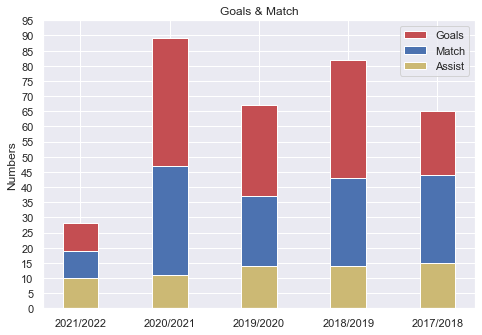

In [104]:
#Question(1): Analysis for his number of match, Goaals, and assist over seasons

#transfer the data in the table into a values
Season = df['Season'].values 
Goals = df['Goals'].values
Match = df['Match'].values
Assist = df['Assist'].values

# plotting a bar chart 

width = 0.40
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Season, Goals, width,bottom=Match, color='r')
ax.bar(Season, Match, width, color='b')
ax.bar(Season, Assist, width, color='y')
# naming the y-axis
ax.set_ylabel('Numbers')
# naming the x-axis
ax.set_title('Goals & Match')
#arrange of number on x and y axis
ax.set_yticks(np.arange(0, 100, 5))
ax.legend(labels=['Goals', 'Match','Assist'])
# function to show the plot
plt.show()

The time played is
[1637 3711 2716 3492 3395]
The assist ratio is
[0.54978619 0.26677445 0.46391753 0.36082474 0.39764359]
The goal ratio is
[0.49480757 1.01859337 0.99410898 1.00515464 0.55670103]


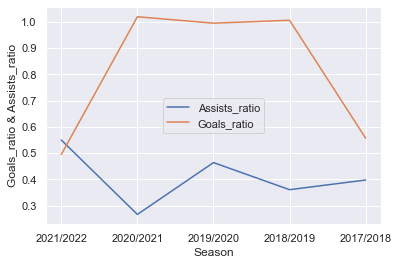

In [105]:
#Question(2) Calculate the goals & assists ratio over season

#transfer the data in the table into a values
Time_played = df['Time played (Min)'].values
print("The time played is")
print(Time_played)

#calculate the Assists_ratio depend on Time_played
Assists_ratio = Assist/(Time_played/90)
print("The assist ratio is")
print(Assists_ratio)

#calculate the Goals_ratio depend on Time_played
Goals_ratio = Goals/(Time_played/90)
print("The goal ratio is")
print(Goals_ratio)

# plotting the line 1 points
plt.plot(Season, Assists_ratio, label = "Assists_ratio")

# plotting the line 2 points
plt.plot(Season, Goals_ratio,  label = "Goals_ratio")

# naming the x axis
plt.xlabel('Season')
# naming the y axis
plt.ylabel('Goals_ratio & Assists_ratio')

# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

the shot accuracy is:
[0.36       0.60869565 0.44776119 0.48148148 0.39622642]
the pass accuracy is:
[0.81021898 0.8004886  0.81903643 0.79682854 0.75457875]


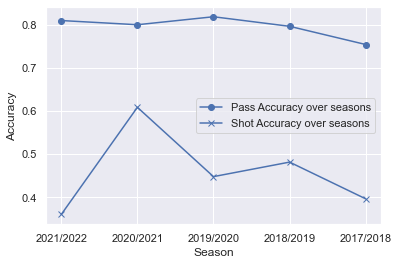

In [106]:
#Question(3) Calculate the shot and pass Accuracy (out of 1)

#Calculate the shot accuracy depend on goals and shot on target

On_Target = df['On Target'].values
Shot_Accuracy = Goals/On_Target #calculate the shot accuracy
print("the shot accuracy is:")
print(Shot_Accuracy)

#Calculate the pass accuracy depend on compleated pass
Pass = df['Passes'].values
completed_pass = df['Completed Passes'].values
Pass_Accuracy = completed_pass/Pass #calculate the pass accuracy
print("the pass accuracy is:")
print(Pass_Accuracy) 

# Create a chart for his Pass_Accuracy
plt.plot(Season,Pass_Accuracy,'b-o',label='Pass Accuracy over seasons');

#name x & y axis
plt.xlabel('Season')
plt.ylabel('Accuracy')

# Create a chart for his Shot_Accuracy
plt.plot(Season,Shot_Accuracy,'b-x',label='Shot Accuracy over seasons');

#name x & y axis
plt.xlabel('Season')
plt.ylabel('Accuracy')

# plot a chart
plt.legend()
plt.show()

[0.56371721 0.75898862 0.82791731 0.74634285 0.52035263]


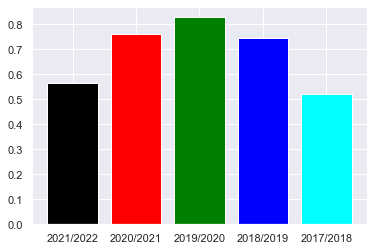

In [107]:
# Question (4) calculating the overall rating depend on (goals and assits ratio & shot and pass accuracy) (out of 1)

overall_rating = (Shot_Accuracy * Pass_Accuracy) + (Goals_ratio * Assists_ratio) #froumla that we used 
print(overall_rating)

#create a bar char for overall rating
# create a dataset
height = overall_rating
bars = Season
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()

In [108]:
# Question (5) calculate the Expected Goals

#calculate the time ratio over seasons
Time_ratio = Time_played/(Match*90) #formula we used
print("the Time_ratio is:")
print(Time_ratio)

#calculate X_ratio
X_ratio = Time_ratio * Goals_ratio * Shot_Accuracy
print("the X_ratio is:")
print(X_ratio)

#calculate y_ratio
y_ratio = (X_ratio * Goals) + (X_ratio * On_Target)
print("the y_ratio is:")
print (y_ratio)
#add the y_ratio into the main table
df['y_ratio'] = y_ratio
#add the percent for each season we use for expected goals, so we use 40% percent from his last season performance and 20% from other seasons performance
percent = [0,0.4,0.2,0.2,0.2]
print(percent)
df['percent'] = percent
print(df)
#############################
new_goals = y_ratio * percent * 0.8
Expected_goals = sum(new_goals)
print("the Expected_goals is:")
print(Expected_goals)

the Time_ratio is:
[0.95730994 0.87730496 0.81561562 0.90232558 0.85732323]
the X_ratio is:
[0.17052632 0.5439408  0.36304962 0.43669251 0.18910806]
the y_ratio is:
[ 5.79789474 60.37742831 35.21581283 52.40310078 13.99399657]
[0, 0.4, 0.2, 0.2, 0.2]
      Season       Club  Match  Match start  Time played (Min)  Goals  Assist  \
0  2021/2022  Paris S-G     19         1.00               1637      9      10   
1  2020/2021  Paris S-G     47         0.87               3711     42      11   
2  2019/2020  Paris S-G     37         0.89               2716     30      14   
3  2018/2019  Paris S-G     43         0.77               3492     39      14   
4  2017/2018  Paris S-G     44         0.91               3395     21      15   

   Shoots  On Target  Passes  Completed Passes   MV    y_ratio  percent  
0      69         25     685               555  160   5.797895      0.0  
1     136         69    1228               983  180  60.377428      0.4  
2     117         67     851            

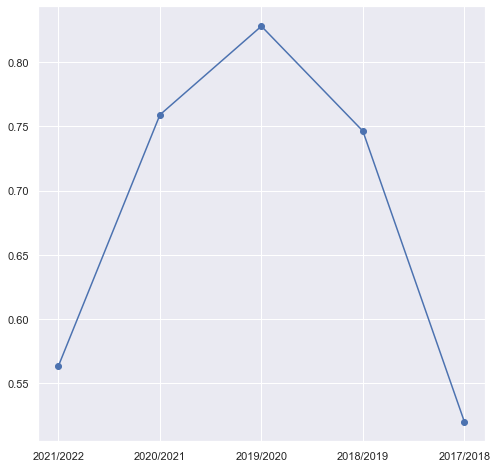

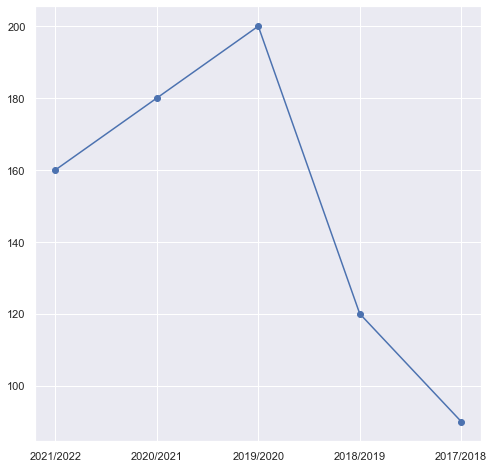

In [109]:
#Question (6) Market value and overall rating 

marketValue = df['MV'].values #define the market value as a value
df['overall_rating'] = overall_rating #put the overall rating in the main table

#create the chart for overall rating
# data
df = pd.DataFrame({
    'x_axis': Season, 
    'y_axis': overall_rating 
})
 
# plot
fig = plt.figure(figsize=(8,8))
plt.plot('x_axis', 'y_axis', data=df, linestyle='-', marker='o')
plt.show()
#create a chart for market value over seasons
# data
df = pd.DataFrame({
    'x_axis': Season, 
    'y_axis': marketValue 
})
 
# plot
fig = plt.figure(figsize=(8,8))
plt.plot('x_axis', 'y_axis', data=df, linestyle='-', marker='o')
plt.show()
